In [2]:
#import libraries
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
import os
import random
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import History
from PIL import Image

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

In [3]:
# Set the path to the dataset folder
dataset_path = '/kaggle/input/image-classification/'
train_data_dir = os.path.join(dataset_path, 'images', 'images')
validation_data_dir = os.path.join(dataset_path, 'validation', 'validation')

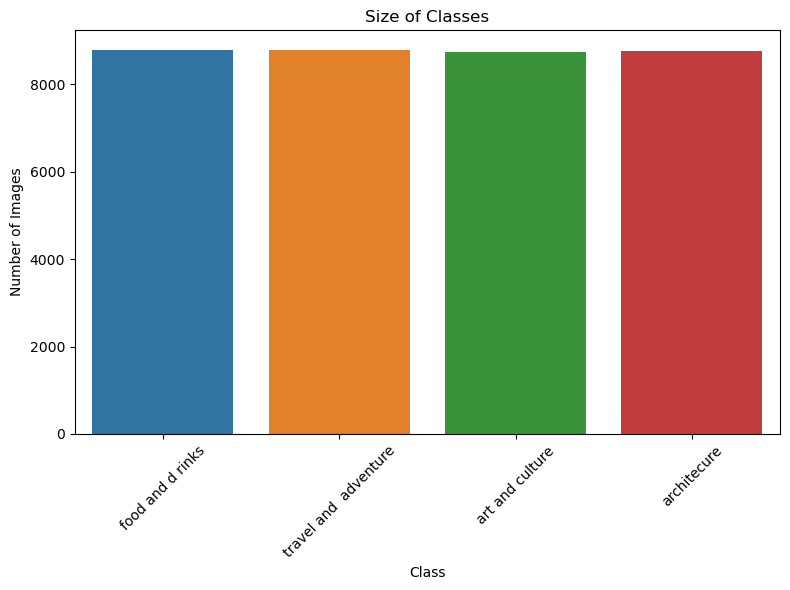

In [5]:
# Count the number of train images in each class
class_sizes = []
class_labels = []
for class_label in os.listdir(train_data_dir):
    class_folder = os.path.join(train_data_dir, class_label)
    if os.path.isdir(class_folder):
        num_images = len(os.listdir(class_folder))
        class_sizes.append(num_images)
        class_labels.append(class_label)

# Create the bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=class_labels, y=class_sizes)
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.title('Size of Classes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

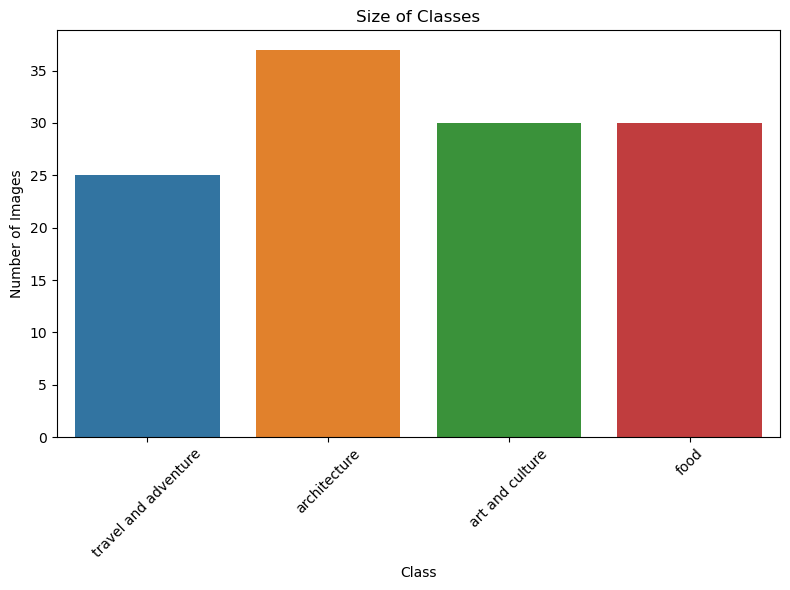

In [6]:
# Count the number of validation images in each class
vclass_sizes = []
vclass_labels = []
for vclass_label in os.listdir(validation_data_dir):
    vclass_folder = os.path.join(validation_data_dir, vclass_label)
    if os.path.isdir(vclass_folder):
        num_images = len(os.listdir(vclass_folder))
        vclass_sizes.append(num_images)
        vclass_labels.append(vclass_label)

# Create the bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=vclass_labels, y=vclass_sizes)
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.title('Size of Classes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [22]:
# Set the image dimensions
img_width, img_height = 150, 150

# Set the number of epochs and batch size
epochs = 20
batch_size = 32

In [23]:
# Generate augmented training data
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

# Only rescale the validation data
validation_datagen = ImageDataGenerator(rescale=1.0 / 255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)

Found 35093 images belonging to 4 classes.
Found 122 images belonging to 4 classes.


In [24]:
#generate conv model
from tensorflow.keras import regularizers
from tensorflow.keras.layers import BatchNormalization, Dropout

model = Sequential()

model.add(Conv2D(64, (3, 3), padding='same', activation='relu', input_shape=(img_width, img_height, 3)))
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(Dropout(0.5))

model.add(Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(Dropout(0.5))

model.add(Dense(4, activation='softmax'))

model.compile(optimizer='adam', metrics=['accuracy'], loss='categorical_crossentropy')

In [25]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 150, 150, 64)      1792      
                                                                 
 conv2d_8 (Conv2D)           (None, 150, 150, 64)      36928     
                                                                 
 batch_normalization_3 (Batc  (None, 150, 150, 64)     256       
 hNormalization)                                                 
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 75, 75, 64)       0         
 2D)                                                             
                                                                 
 dropout_5 (Dropout)         (None, 75, 75, 64)        0         
                                                                 
 conv2d_9 (Conv2D)           (None, 75, 75, 128)      

In [26]:
#execute training process
history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=validation_generator
)

Epoch 1/20


2023-06-03 00:51:42.935537: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_1/dropout_5/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


1097/1097 [==============================] - 339s 305ms/step - loss: 4.4119 - accuracy: 0.3688 - val_loss: 2.5613 - val_accuracy: 0.4098
Epoch 2/20
1097/1097 [==============================] - 335s 305ms/step - loss: 1.7248 - accuracy: 0.4985 - val_loss: 2.0206 - val_accuracy: 0.5328
Epoch 3/20
1097/1097 [==============================] - 335s 305ms/step - loss: 1.3370 - accuracy: 0.6562 - val_loss: 2.1754 - val_accuracy: 0.6311
Epoch 4/20
1097/1097 [==============================] - 333s 303ms/step - loss: 1.3449 - accuracy: 0.7279 - val_loss: 2.3829 - val_accuracy: 0.5492
Epoch 5/20
1097/1097 [==============================] - 334s 304ms/step - loss: 1.2024 - accuracy: 0.7738 - val_loss: 1.3375 - val_accuracy: 0.6967
Epoch 6/20
1097/1097 [==============================] - 334s 305ms/step - loss: 1.1314 - accuracy: 0.7923 - val_loss: 2.1121 - val_accuracy: 0.6148
Epoch 7/20
1097/1097 [==============================] - 334s 304ms/step - loss: 1.0861 - accuracy: 0.8005 - val_loss: 1.540

In [27]:
# Save the model
model.save('improved_image_classification_model.h5')

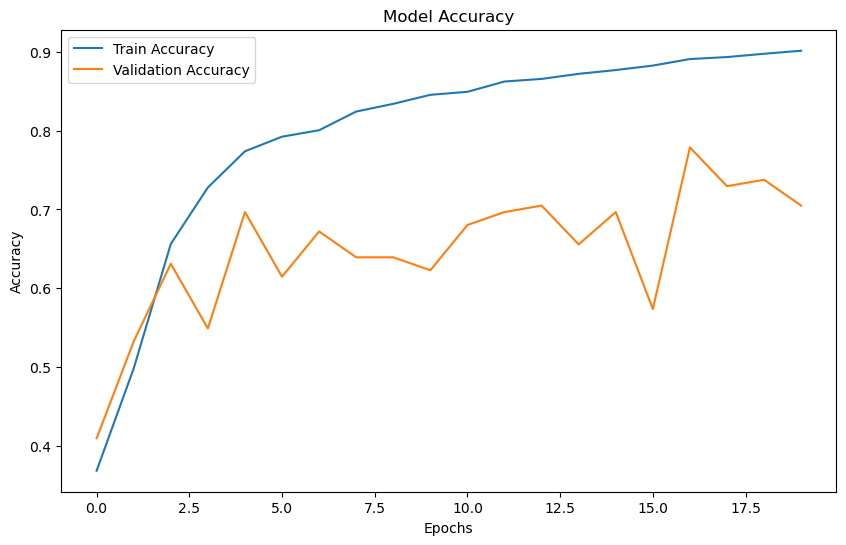

In [28]:
# Plot accuracy history
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

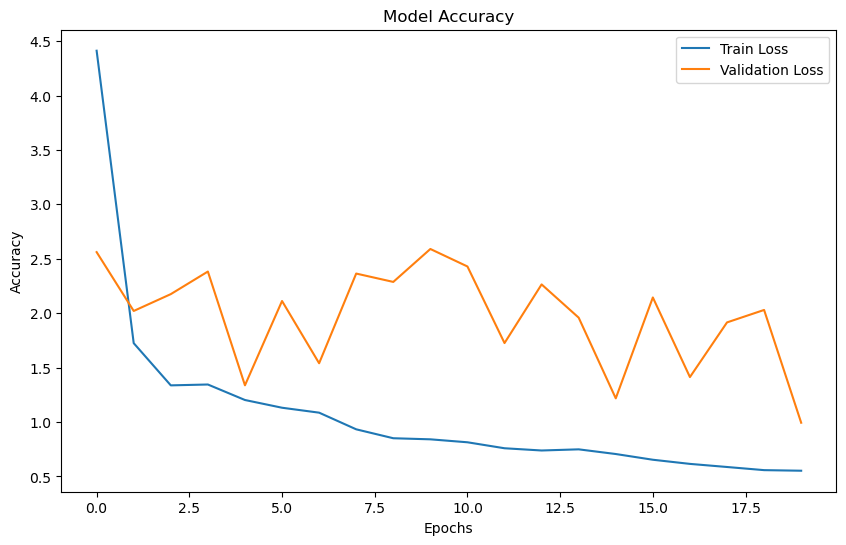

In [29]:
# Plot accuracy history
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [21]:
val_steps = len(validation_generator)
accuracy = model.evaluate(validation_generator, steps=val_steps)
print("Validation Accuracy:", accuracy[1])

4/4 [==============================] - 1s 206ms/step - loss: 1.9011 - accuracy: 0.4262
Validation Accuracy: 0.4262295067310333


1/1 [==============================] - 0s 288ms/step


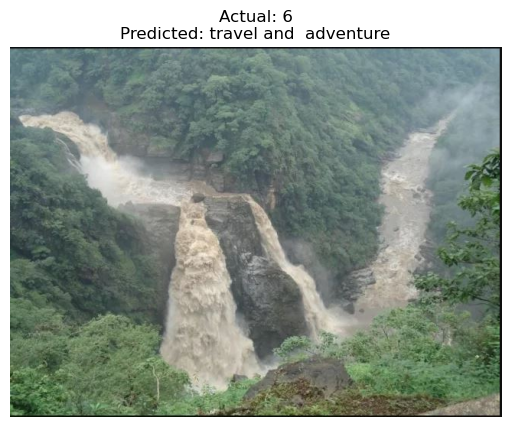

1/1 [==============================] - 0s 22ms/step


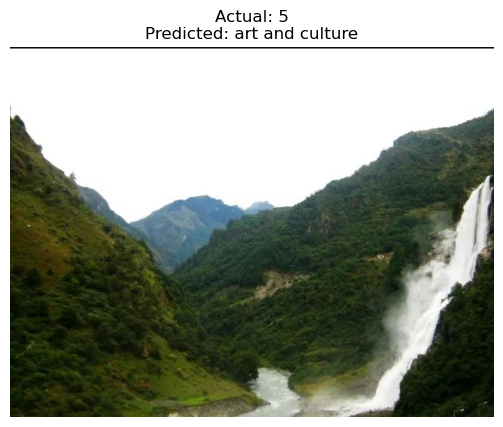

1/1 [==============================] - 0s 21ms/step


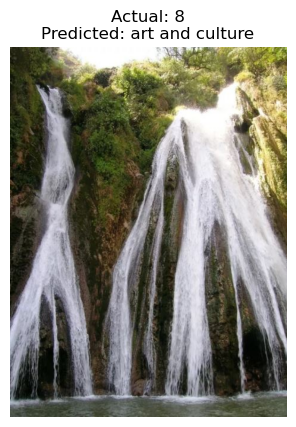

1/1 [==============================] - 0s 21ms/step


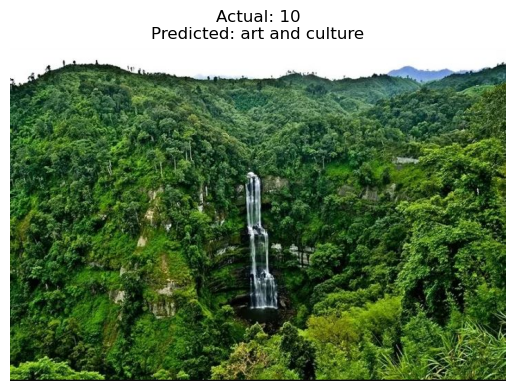

1/1 [==============================] - 0s 20ms/step


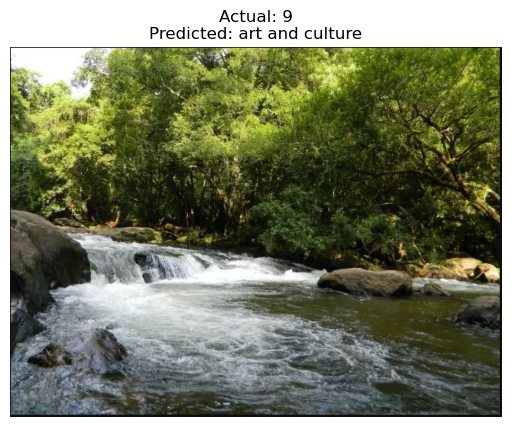

1/1 [==============================] - 0s 21ms/step


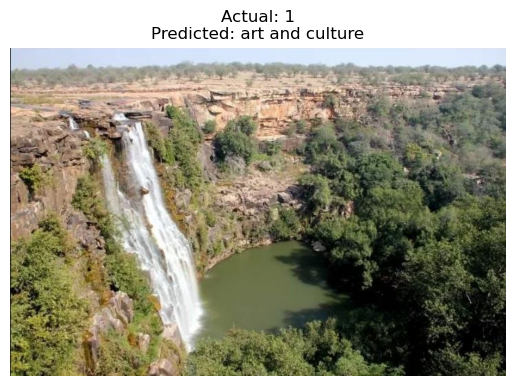

1/1 [==============================] - 0s 20ms/step


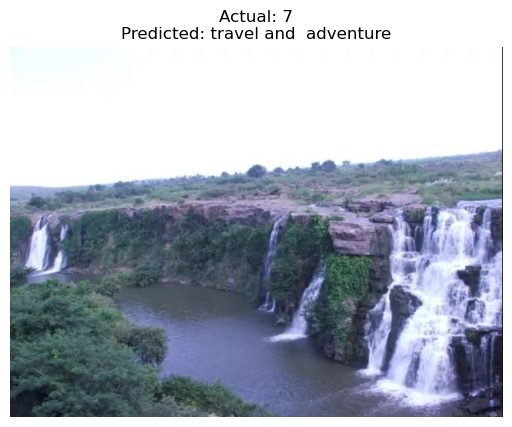

1/1 [==============================] - 0s 21ms/step


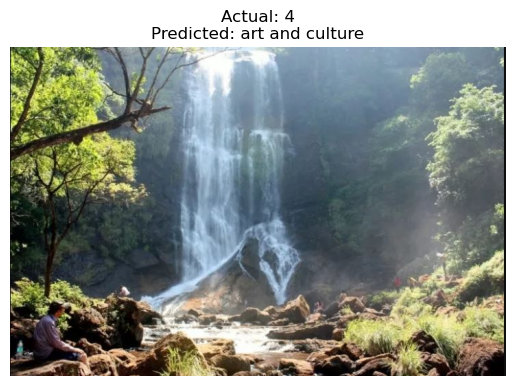

1/1 [==============================] - 0s 20ms/step


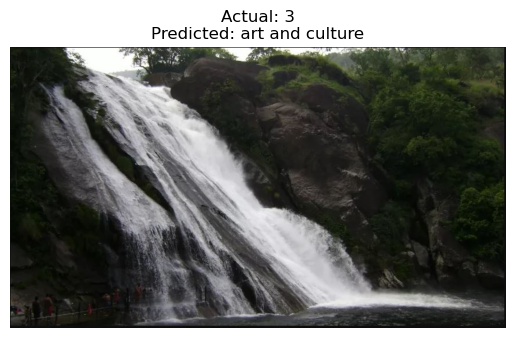

1/1 [==============================] - 0s 20ms/step


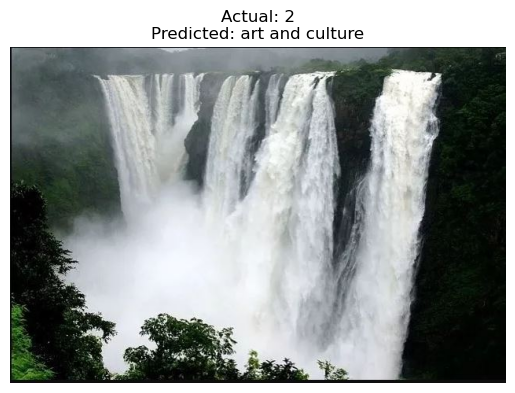

In [30]:
# new_images_path = 'test/test/classify'
new_images_path = os.path.join(dataset_path, 'test', 'test', 'classify')

# Load the saved model
model = tf.keras.models.load_model('improved_image_classification_model.h5')

# Create a dictionary to map class indices to class labels
class_labels = train_generator.class_indices
class_labels = {v: k for k, v in class_labels.items()}

# Iterate over the images in the directory and make predictions
for image_file in os.listdir(new_images_path):
    image_path = os.path.join(new_images_path, image_file)
    img = tf.keras.preprocessing.image.load_img(image_path, target_size=(img_width, img_height))
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0

    prediction = model.predict(img_array)
    predicted_class_index = np.argmax(prediction)
    predicted_class_label = class_labels[predicted_class_index]

    # Get the actual label from the image file name
    actual_class_label = image_file.split('.')[0]

    # Display the image
    plt.figure()
    img_display = plt.imread(image_path)
    plt.imshow(img_display)
    plt.title(f"Actual: {actual_class_label}\nPredicted: {predicted_class_label}")
    plt.axis('off')
    plt.show()
